In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# dependednt varibles Average Sales Price
df = pd.read_csv('Data3.csv',index_col=0,parse_dates=True)
df.head()

,ASPNHSUS,UNRATENSA,MSACSR,HNFSUSNSA
DATE,,,,
1975-01-01,39500,9.0,9.9,345
1975-02-01,40600,9.1,10.4,339
1975-03-01,42100,9.1,8.9,330
1975-04-01,42000,8.6,7.2,325
1975-05-01,43200,8.3,6.8,321


In [28]:
# Goal 
# Time Series Regression model to predict Average Sale Prices of Single Family Houses in America.

In [29]:
# IV
# Monthly Supply of New Houses in the United States (MSACSR)
# New One Family Houses for Sale in the United States (HNFSUSNSA)
# Unemployment Rate (UNRATENSA)

In [49]:
df.index.freq = 'MS'
df.index

DatetimeIndex(['1975-01-01', '1975-02-01', '1975-03-01', '1975-04-01',
               '1975-05-01', '1975-06-01', '1975-07-01', '1975-08-01',
               '1975-09-01', '1975-10-01',
               ...
               '2022-09-01', '2022-10-01', '2022-11-01', '2022-12-01',
               '2023-01-01', '2023-02-01', '2023-03-01', '2023-04-01',
               '2023-05-01', '2023-06-01'],
              dtype='datetime64[ns]', name='DATE', length=582, freq='MS')

In [36]:
df.shape

(582, 4)

<Axes: xlabel='DATE'>

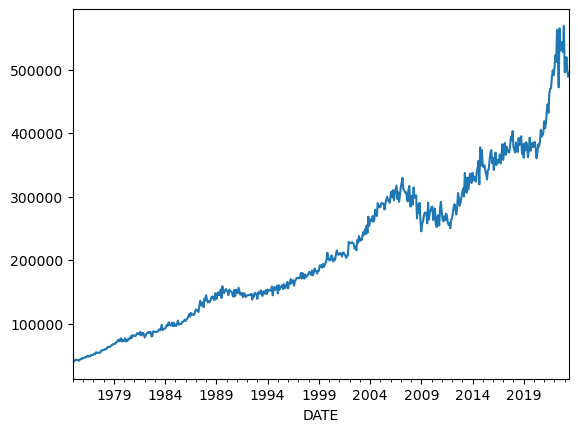

In [38]:
df['ASPNHSUS'].plot()

<Axes: xlabel='DATE'>

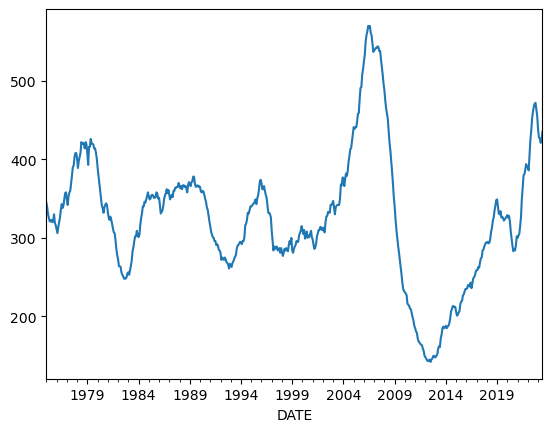

In [39]:
df['HNFSUSNSA'].plot()

<Axes: xlabel='DATE'>

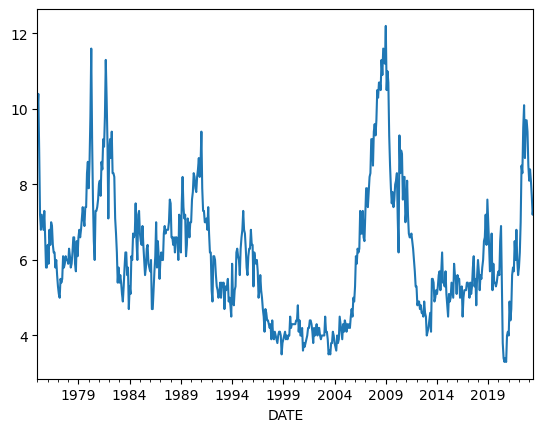

In [40]:
df['MSACSR'].plot()

<Axes: xlabel='DATE'>

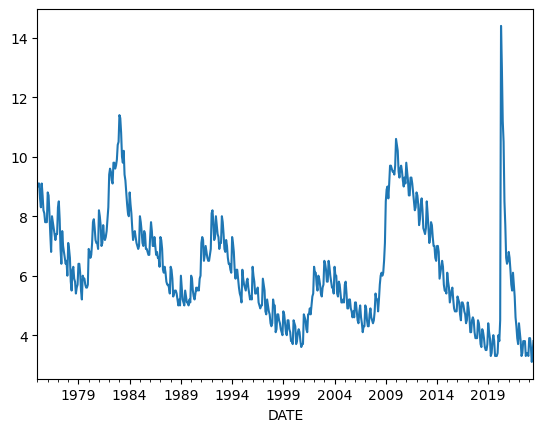

In [41]:
df['UNRATENSA'].plot()

In [90]:
y = df['ASPNHSUS']
X = df[['UNRATENSA','MSACSR','HNFSUSNSA']]

In [91]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80)

In [92]:
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASPNHSUS   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     44.93
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.74e-25
Time:                        13:20:12   Log-Likelihood:                -6038.2
No. Observations:                 465   AIC:                         1.208e+04
Df Residuals:                     461   BIC:                         1.210e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.352e+05   3.45e+04     15.526      0.000    4.67e+05    6.03e+05
UNRATENSA  -3.762e+04   3288.024    -11.442      0.000   -4.41e+04   -3.12e+04
MSACSR      7776.2319   3180.430      2.445      0.015    1526.295     1.4e+04
HNFSUSNSA   -402.3686     71.302     -5.643      0.000    -542.485    -262.252
==============================================================================
Omnibus:                       38.045   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.631
Skew:                           0.764   Prob(JB):                     1.23e-10
Kurtosis:                       3.131   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = fit.predict(X_test_sm)

In [94]:
def accuracy(y_test,y_pred):
    from statsmodels.tools.eval_measures import rmse, rmspe, meanabs, mse
    from sktime.performance_metrics.forecasting import mean_absolute_percentage_error  
    from sklearn.metrics import r2_score
    R_sq= r2_score(y_test,y_pred)
    RMSE = rmse(y_test,y_pred)
    RMSPE = rmspe(y_test,y_pred)
    MAE = meanabs(y_test,y_pred)
    MSE =  mse(y_test,y_pred)
    MAPE = mean_absolute_percentage_error(y_test,y_pred)    
    print('R-SQ : %f' % R_sq, ' RMSE : %f' % RMSE, ' RMSPE : %f' % RMSPE, ' MAE : %f' % MAE, ' MSE : %f' % MSE , ' MAPE : %f' % MAPE)

In [95]:
accuracy(y_test,y_test_pred)

R-SQ : 0.231232  RMSE : 107095.090512  RMSPE : 8.978815  MAE : 92192.268430  MSE : 11469358411.681358  MAPE : 0.638239


In [96]:
# Regression Assumptions Model 1
# Assumpation 1

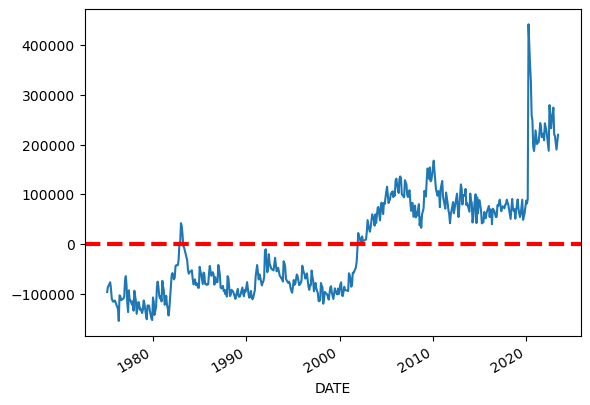

In [97]:
fit.resid.plot()
plt.axhline(y=0,color='red',linewidth=3,linestyle='--')

<Axes: ylabel='Frequency'>

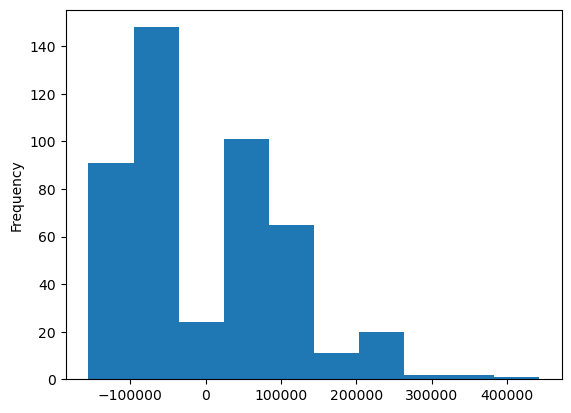

In [98]:
# 2
fit.resid.plot(kind='hist')

In [99]:
# 3
br_geof_test = dg.acorr_breusch_godfrey(fit,nlags=8)
print(br_geof_test[0])
print(br_geof_test[1])

5.220181903699977
0.7338044465454636


C:\Users\reece\AppData\Local\Temp\ipykernel_26340\4074607134.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fit.resid)


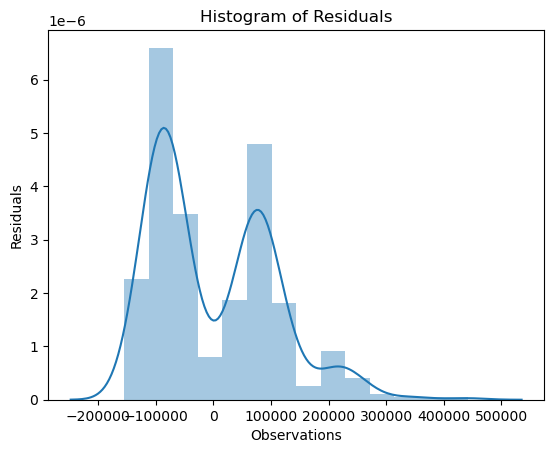

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASPNHSUS   R-squared:                       0.226
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     44.93
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.74e-25
Time:                        13:21:14   Log-Likelihood:                -6038.2
No. Observations:                 465   AIC:                         1.208e+04
Df Residuals:                     461   BIC:                         1.210e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5.352e+05   3.45e+04     15.526      0.000    4.67e+05    6.03e+05
UNRATENSA  -3.762e+04   3288.024    -11.442      0.000   -4.41e+04   -3.12e+04
MSACSR      7776.2319   3180.430      2.445      0.015    1526.295     1.4e+04
HNFSUSNSA   -402.3686     71.302     -5.643      0.000    -542.485    -262.252
==============================================================================
Omnibus:                       38.045   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               45.631
Skew:                           0.764   Prob(JB):                     1.23e-10
Kurtosis:                       3.131   Cond. No.                     2.37e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.37e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

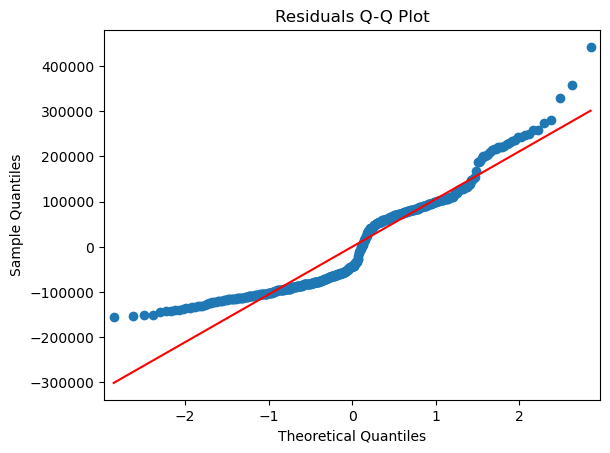

In [100]:
# 4
sns.distplot(fit.resid)
plt.title('Histogram of Residuals')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()
       
sm.qqplot(fit.resid, line='s')    
plt.title('Residuals Q-Q Plot')


fit.summary()

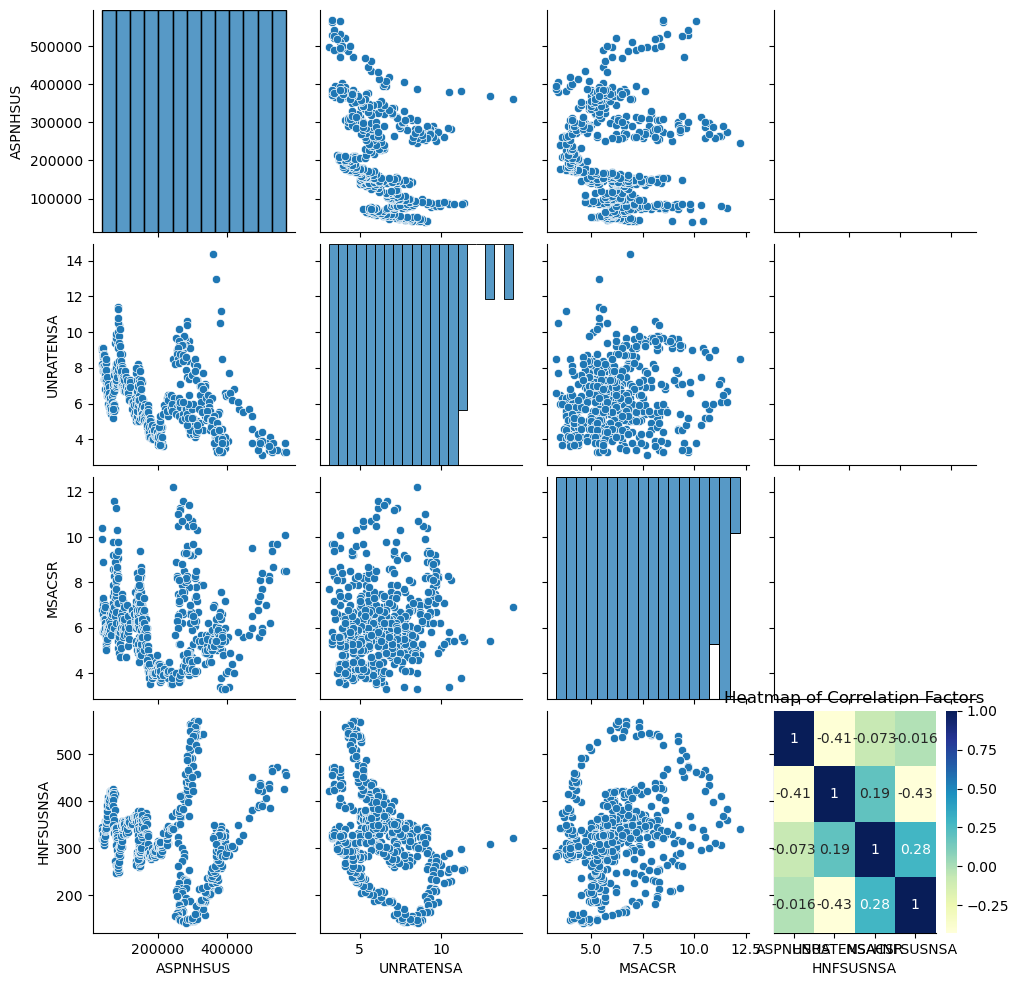

In [101]:
# 5
sns.pairplot(df)


sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.title('Heatmap of Correlation Factors')
plt.show()

In [78]:
y = df['ASPNHSUS']
X = df[['UNRATENSA','MSACSR']]
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.80)
X_train_sm = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_sm)
fit=model.fit()
fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASPNHSUS   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     55.95
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.75e-22
Time:                        13:04:14   Log-Likelihood:                -6057.8
No. Observations:                 465   AIC:                         1.212e+04
Df Residuals:                     462   BIC:                         1.213e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.921e+05   2.46e+04     15.944      0.000    3.44e+05     4.4e+05
UNRATENSA  -2.999e+04   2846.795    -10.535      0.000   -3.56e+04   -2.44e+04
MSACSR      2150.2729   3114.884      0.690      0.490   -3970.823    8271.368
==============================================================================
Omnibus:                       32.814   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.772
Skew:                           0.649   Prob(JB):                     1.71e-08
Kurtosis:                       2.600   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
X_test_sm = sm.add_constant(X_test)
y_test_pred = fit.predict(X_test_sm)

In [80]:
accuracy(y_test,y_test_pred)

R-SQ : 0.044723  RMSE : 108424.222631  RMSPE : 10.299486  MAE : 96766.945817  MSE : 11755812053.081131  MAPE : 0.709663


In [81]:
# Regression Assumptions Model 2

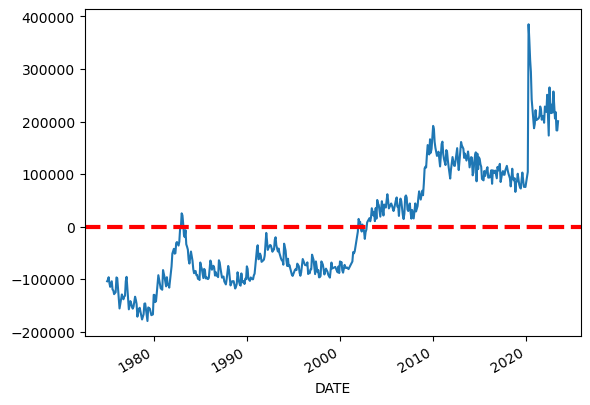

In [82]:
#(i)
fit.resid.plot()
plt.axhline(y=0,color='red',linewidth=3,linestyle='--')

<Axes: ylabel='Frequency'>

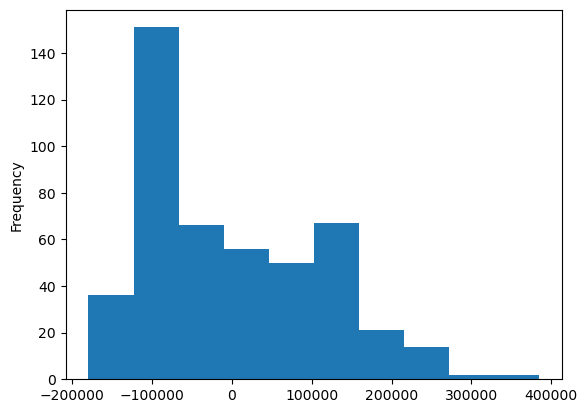

In [83]:
# 2
fit.resid.plot(kind='hist')

In [86]:
# 3
import statsmodels.stats.diagnostic as dg
br_geof_test = dg.acorr_breusch_godfrey(fit,nlags=8)
print(br_geof_test[0])
print(br_geof_test[1])

10.270400492470491
0.2465579569442453


C:\Users\reece\AppData\Local\Temp\ipykernel_26340\1137462970.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fit.resid)


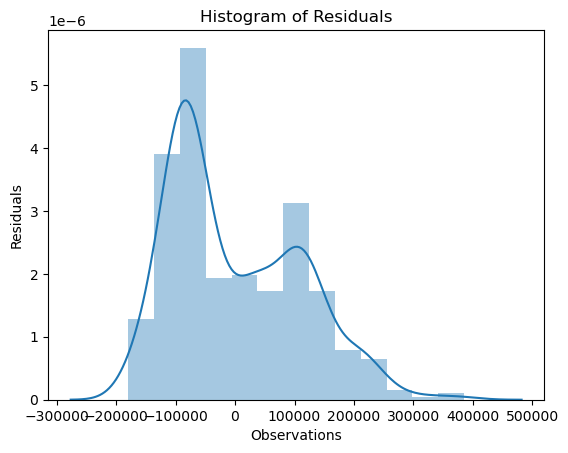

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ASPNHSUS   R-squared:                       0.195
Model:                            OLS   Adj. R-squared:                  0.191
Method:                 Least Squares   F-statistic:                     55.95
Date:                Sat, 29 Jul 2023   Prob (F-statistic):           1.75e-22
Time:                        13:14:10   Log-Likelihood:                -6057.8
No. Observations:                 465   AIC:                         1.212e+04
Df Residuals:                     462   BIC:                         1.213e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.921e+05   2.46e+04     15.944      0.000    3.44e+05     4.4e+05
UNRATENSA  -2.999e+04   2846.795    -10.535      0.000   -3.56e+04   -2.44e+04
MSACSR      2150.2729   3114.884      0.690      0.490   -3970.823    8271.368
==============================================================================
Omnibus:                       32.814   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               35.772
Skew:                           0.649   Prob(JB):                     1.71e-08
Kurtosis:                       2.600   Cond. No.                         43.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

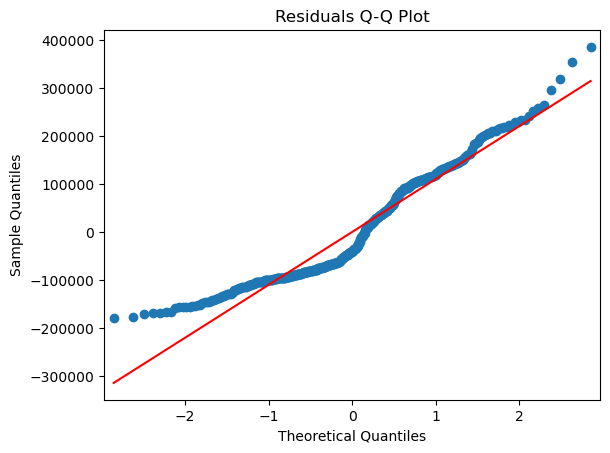

In [87]:
# 4 
sns.distplot(fit.resid)
plt.title('Histogram of Residuals')
plt.xlabel('Observations')
plt.ylabel('Residuals')
plt.show()
       
sm.qqplot(fit.resid, line='s')    
plt.title('Residuals Q-Q Plot')


fit.summary()


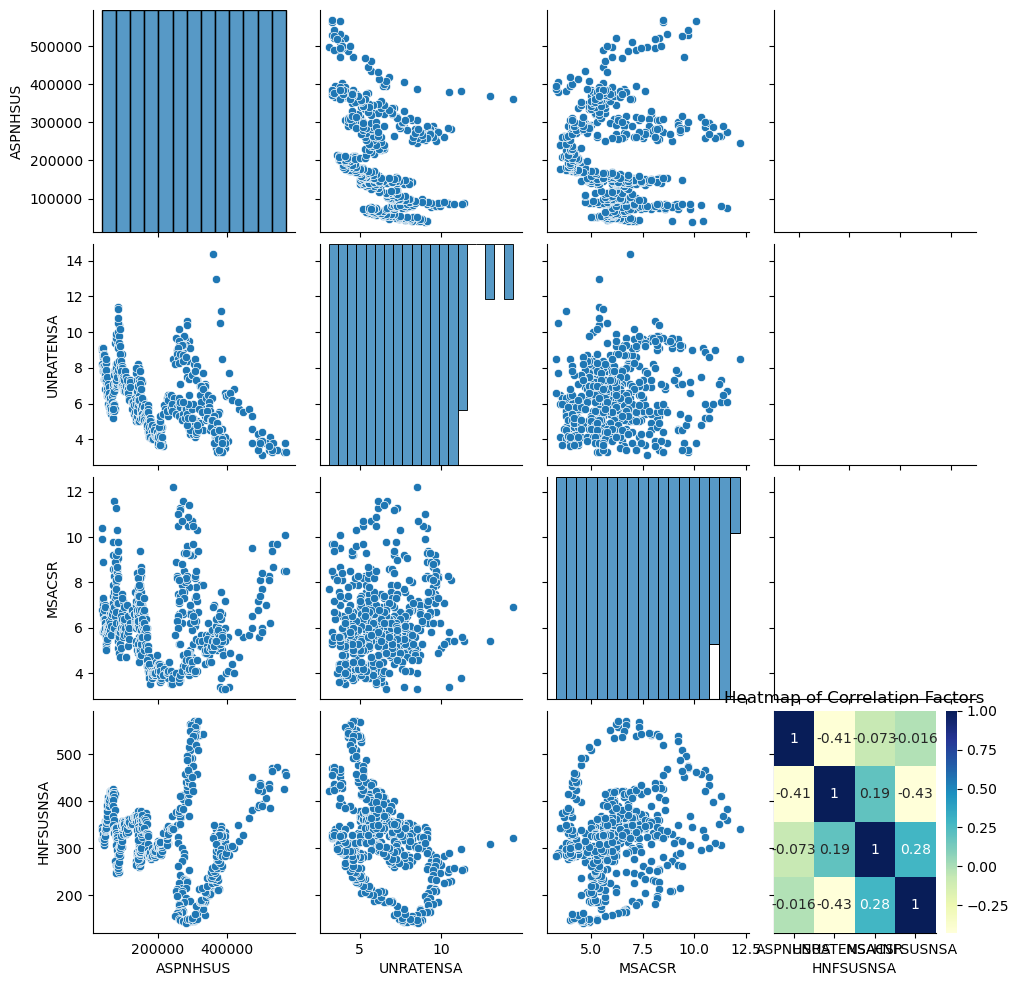

In [88]:
# 5
sns.pairplot(df)


sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.title('Heatmap of Correlation Factors')
plt.show()

In [102]:
# next 24 hours 

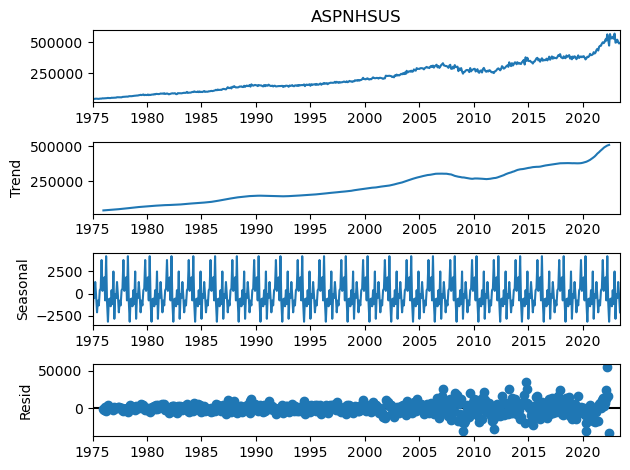

In [103]:
from statsmodels.tsa.seasonal import seasonal_decompose
y = df['ASPNHSUS']
decom = seasonal_decompose(y,period=24)
decom.plot()
plt.show()

In [108]:
from statsmodels.tsa.stattools import adfuller # confirms stationary
dftest = adfuller(y)

In [109]:
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','# of Lags','# of Obs'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)

Test Statistic            0.360633
p-value                   0.979962
# of Lags                 9.000000
# of Obs                572.000000
Critical Value (1%)      -3.441834
Critical Value (5%)      -2.866606
Critical Value (10%)     -2.569468
dtype: float64


<Axes: xlabel='DATE'>

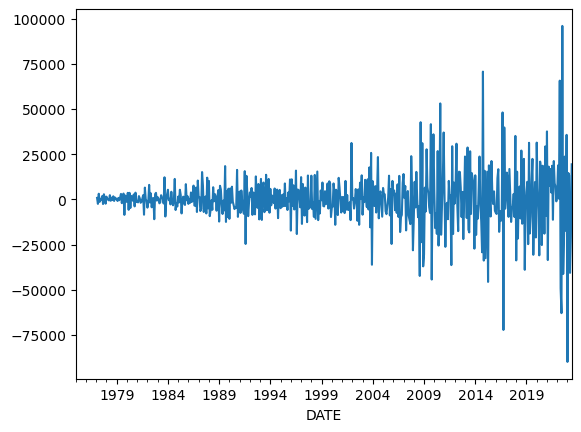

In [110]:
y_diff = y.diff().diff(24)
y_diff.plot()

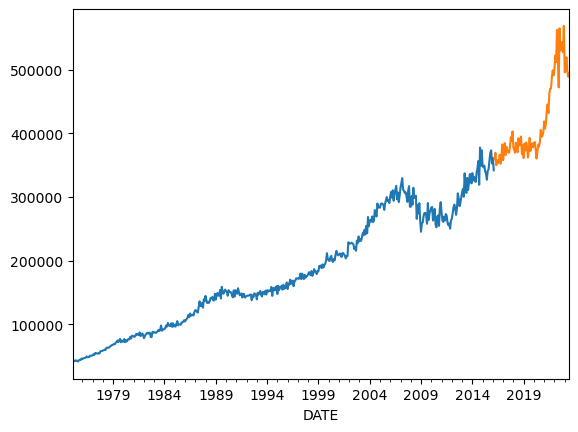

In [111]:
train_size = int(len(y)*0.85)
train = y[1:train_size]
test = y[train_size:]
train.plot(label='Train')
test.plot(label='Test')
plt.show()